In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

EMPTY = 0

# Agent and Environment

In [2]:
class Agent:
    def __init__(self, row, col, board):
        # board is mutable
        self.row = row
        self.col = col
        self.board = board
        self.race = board[row, col]

    def satisfied(self, threshold):
        n_row_l = max(0, self.row - 1)
        n_row_h = min(self.board.shape[0] - 1, self.row + 1)
        n_col_l = max(0, self.col - 1)
        n_col_h = min(self.board.shape[1] - 1, self.col + 1)

        neighbors = self.board[n_row_l : n_row_h + 1, n_col_l : n_col_h + 1]
        segregation = np.sum(neighbors == self.race) / (
            neighbors.shape[0] * neighbors.shape[1] - np.sum(neighbors == EMPTY)
        )

        return segregation >= threshold, segregation

    def segregation(self, threshold):
        return self.satisfied[1]

    def move(self):
        available = np.where(self.board == EMPTY)
        ava_ind = np.random.randint(0, len(available[0]))

        self.board[self.row, self.col] = EMPTY
        self.row = available[0][ava_ind]
        self.col = available[1][ava_ind]
        self.board[self.row, self.col] = self.race

In [3]:
class Environment:
    def __init__(self, length, width, races, props, threshold=0.5):
        self.length = length
        self.width = width
        self.races = races
        self.props = props
        self.threshold = threshold

        self.reset()

    def reset(self):
        self.board = self._init_board()
        self.agents = self._init_agents()

    def _init_board(self):
        assert (
            sum([self.props[r] for r in self.races]) == 1.0
        ), f"Error props {self.props}"
        total = self.length * self.width
        board = np.full((self.length, self.width), -1)

        for r in self.races:
            available = np.where(board == -1)
            ava_ind = np.arange(0, len(available[0]))
            np.random.shuffle(ava_ind)
            ava_ind = ava_ind[: int(self.props[r] * total)]
            race_ind = available[0][ava_ind], available[1][ava_ind]
            board[race_ind] = r

        assert not (board == -1).any(), "Incomplete board"
        return board

    def _init_agents(self):
        agents = []

        for i in range(self.length):
            for j in range(self.width):
                if self.board[i, j] > 0:
                    agents.append(Agent(i, j, self.board))
        return agents

    def agents_move(self):
        for a in self.agents:
            if not a.satisfied(self.threshold)[0]:
                a.move()

    def overall_segregation(self):
        return np.mean([a.satisfied(self.threshold)[1] for a in self.agents])

    def show(self):
        plt.matshow(self.board)
        plt.show()

# Visualize

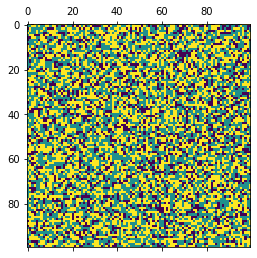

In [4]:
env = Environment(100, 100, [EMPTY, 1, 2], {EMPTY: 0.2, 1: 0.4, 2: 0.4})
env.show()

for _ in range(10):
    env.agents_move()

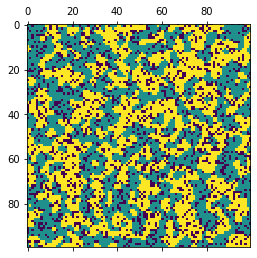

In [5]:
env.show()

# Results

In [6]:
data = {"epoch": [], "step": [], "seg": [], "threshold": []}
# requires around half an hour with the following parameters
n_ep = 100
n_step = 20
n_row = 100
n_col = 100

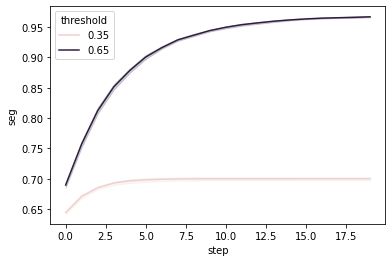

In [7]:
threshold = 0.35
env = Environment(
    n_row, n_col, [EMPTY, 1, 2], {EMPTY: 0.2, 1: 0.4, 2: 0.4}, threshold=threshold
)

for ep in range(n_ep):
    env.reset()

    for step in range(n_step):
        env.agents_move()
        data["epoch"].append(ep)
        data["step"].append(step)
        data["seg"].append(env.overall_segregation())
        data["threshold"].append(threshold)

threshold = 0.65
env = Environment(
    n_row, n_col, [EMPTY, 1, 2], {EMPTY: 0.2, 1: 0.4, 2: 0.4}, threshold=threshold
)

for ep in range(n_ep):
    env.reset()

    for step in range(n_step):
        env.agents_move()
        data["epoch"].append(ep)
        data["step"].append(step)
        data["seg"].append(env.overall_segregation())
        data["threshold"].append(threshold)

df = pd.DataFrame.from_dict(data)
_ = sns.lineplot(x="step", y="seg", data=df, hue="threshold")